## Introduction
The inspiration for this project comes from the Boston Regression project. In the Boston Regression project, we identified the Top 5 most significant features affecting the median housing values, which are **RM, LSTAT, DIS, CRIM, PTRATIO**. This project seeks to dig deeper into the relationship between these variables and the median housing values.
<br>**Question 1**
<br>What is the relationship between the percentage of Lower status of the population and the median housing value in Boston?
<br>**Question 2**
<br>Does the average number of room per dwelling significantly affects the median housing value in Boston?
<br>**Question 3**
<br>Does the weighted distances to five Boston employment centres affects the median housing value in Boston?
<br>**Question 4**
<br> In what way is crime rate related to the median housing values?

## Data Wrangling
In this section of the report,the data will be loaded, checked for cleanliness, and then trimmed and prepared for analysis.

### General Properties

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Load the Boston dataset into the pandas dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delimiter = r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Check for duplicated values
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**from the overview of the dataset, we can see that the dataset is clean and ready for analysis, having no null values or duplicates and the column are in the right datatype.**

## Univariate Exploration
> In this section, we will investigate the distributions of the individual variables.

**We are going to investigate firstly the variables of interest then go to other variables**

**Let us start with the main variable of interest LSTAT(Lower Status of population) and RM(average room per dwelling)**

In [8]:
# create a function that plots the histogram and the boxplot
def hist_and_box_plot(data, X, xlabel, ylabel, title):
    plt.figure(figsize=[14,8])
    plt.subplot(1,2,1)
    plt.hist(data = df, x = X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.subplot(1,2,2)
    sns.boxplot(x=df[X])
    plt.axvline(np.median(df[X]), color='red', linestyle='dashed', linewidth=1, label=f'Median = {np.median(df[X]):.2f}')
    plt.title(f" Boxplot of {title}")
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

In [9]:
# Create a function that calculates and prints out the upper and lower bound 
def cal_and_return_upper_lower_bound(data, x):
    q1 = np.percentile(data[x], 25)
    q3 = np.percentile(data[x], 75)
    IQR= q3 - q1
    upperbound=q3+1.5*IQR
    lowerbound=q1-1.5*IQR
    return float(format(upperbound, '.2f')), float(format(lowerbound, '.2f'))

In [10]:
# create a function that plots a histogram without outliers
def hist_without_outliers(data, X, xlabel, ylabel, title):
    upper, lower = cal_and_return_upper_lower_bound(df, X)
    plt.figure(figsize=[14,8])
    plt.subplot(1,2,1)
    plt.hist(data = df, x = X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim((lower, upper))
    plt.title(title)  

In [11]:
# create a funtion that plots a histogram with log tarnsformation
def hist_logarithimic_scale(data, X, step, tick):
    bins = 10**(np.arange(min(np.log10(df[X])), max(np.log10(df[X]))+step,step))
    ticks = tick
    labels = ['{}'.format(val) for val in ticks]
    plt.hist(data = df, x = X, bins = bins)
    plt.axvline(np.median(df[X]), color='red', linestyle='dashed', linewidth=1,label=f'Median = {np.median(df[X]):.2f}')
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.legend()
    plt.show()

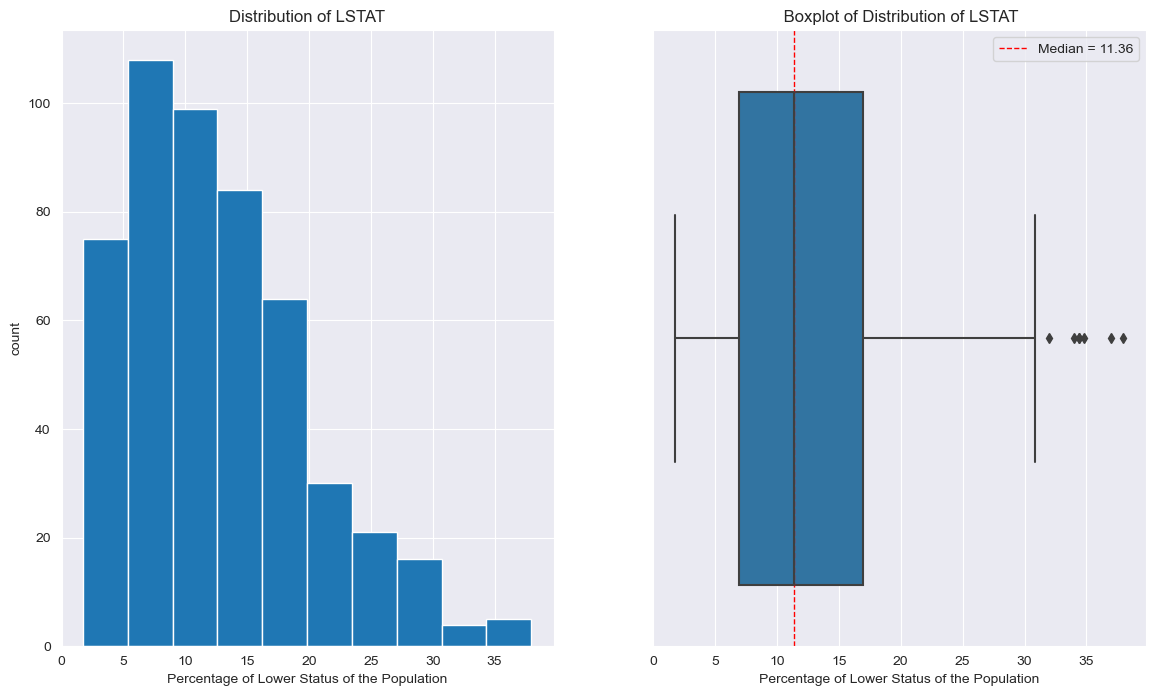

In [12]:
# Create an histogram and a box plot of the Percentage of Lower Status of the Population
hist_and_box_plot(df, 'LSTAT', 'Percentage of Lower Status of the Population', 'count', 'Distribution of LSTAT')

**From the plot above, we can see that the distribution of LSTAT is right skewed indicating that the median would be a better measure of central tendency.**

- Earlier, we can see that the **median value of LSTAT is 11.36%**, expressed in percentage. This tells us that most towns will have a LSTAT value around or below 11.36%.
- Since LSTAT is a socio-economic indicator, it means that most towns have people with higher socio-economic status, meaning most towns have people with good education, good income and good occupation.
- Also, since it is right skewed, few towns will have higher percentage of people with low socio-economic status, meaning few towns have a significantly higher number of people with low education, low income and employment in lower paying, less skilled jobs.

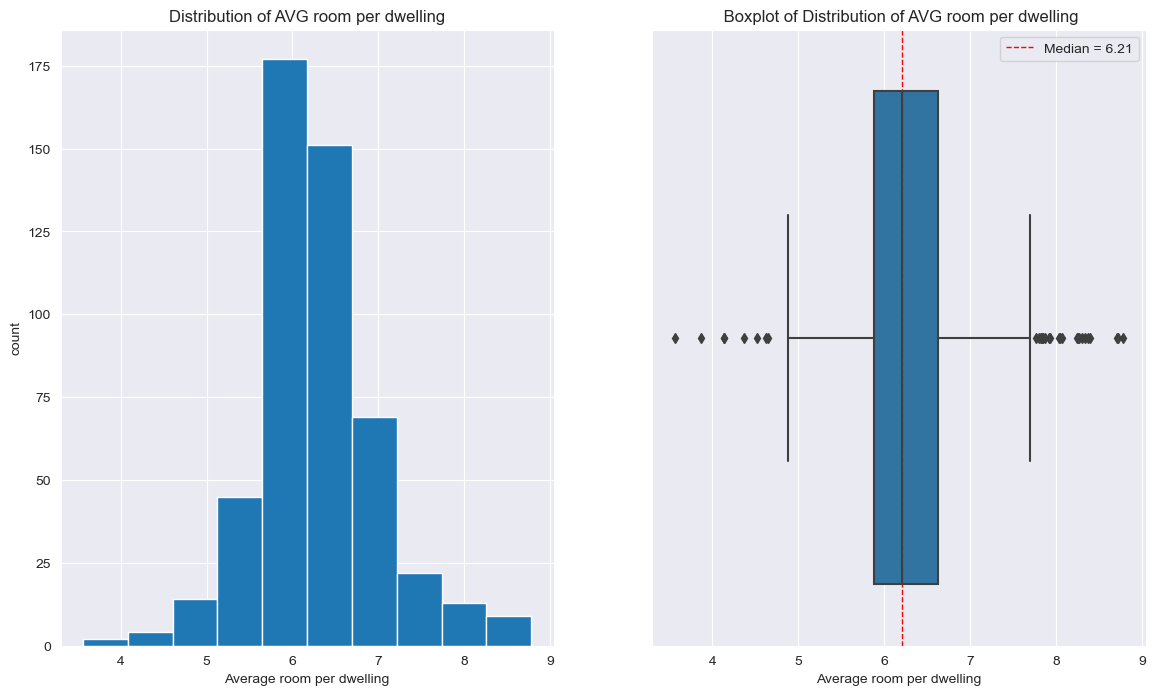

In [13]:
# Create an histogram and a box plot of the Average room per dwelling
hist_and_box_plot(df, 'RM', 'Average room per dwelling', 'count', 'Distribution of AVG room per dwelling')

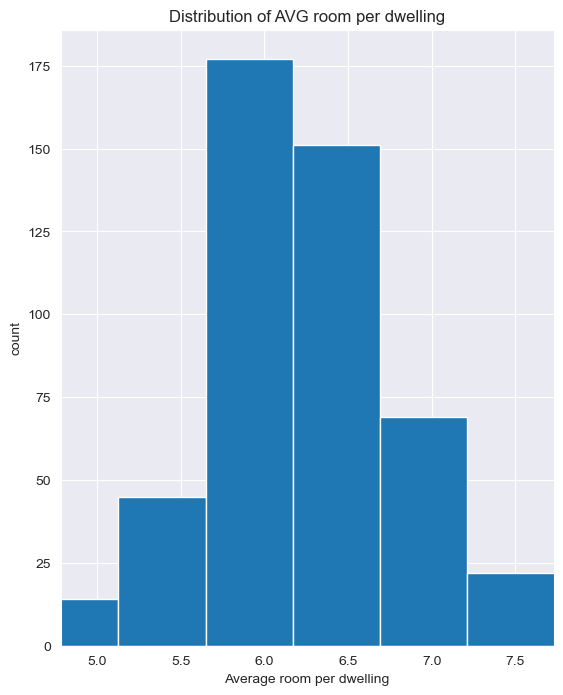

In [14]:
hist_without_outliers(df, 'RM', 'Average room per dwelling', 'count', 'Distribution of AVG room per dwelling')

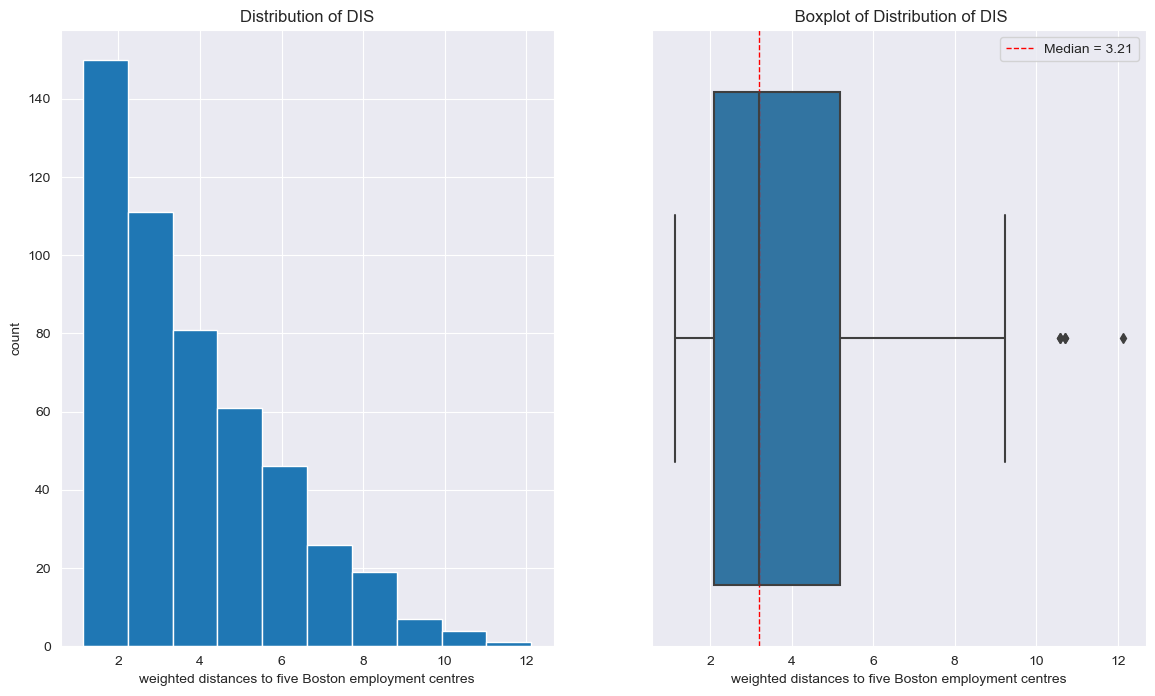

In [15]:
# Create an histogram and a box plot of the weighted distances to five Boston employment centres
hist_and_box_plot(df, 'DIS', 'weighted distances to five Boston employment centres', 'count', 'Distribution of DIS')

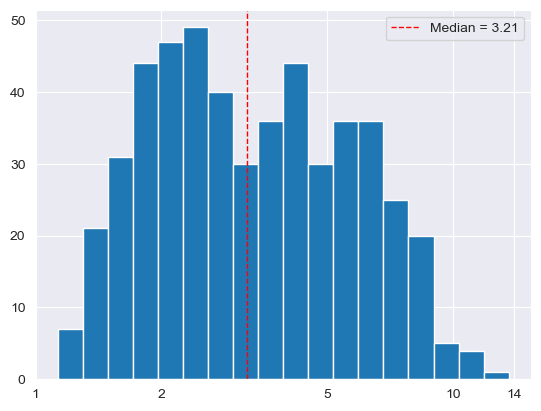

In [16]:
hist_logarithimic_scale(df, 'DIS', 0.06, [1,2,5,10,14])

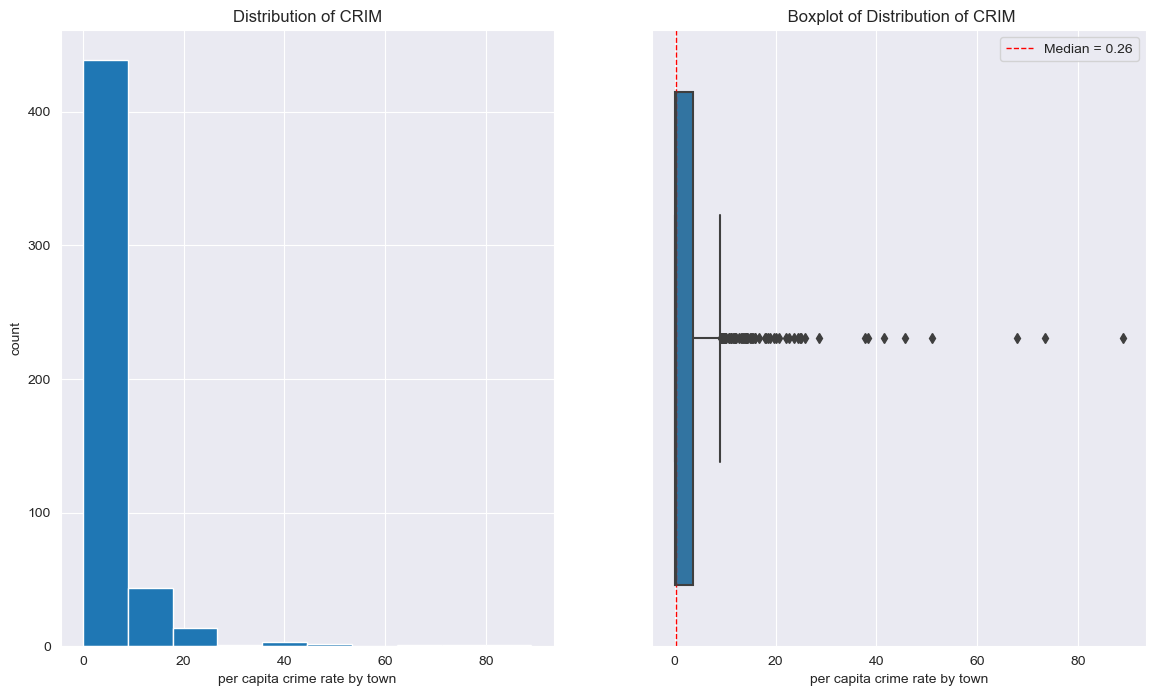

In [17]:
# Create a histogram and a box plot that shows the distribution of crime rate
hist_and_box_plot(df, 'CRIM', 'per capita crime rate by town', 'count', 'Distribution of CRIM')

*We can see from the charts that the presence of outliers is significantly affecting the chart and we can not see the distribution of the data points for the Crime rate, but it is good to know that the histogram plot tells us that it is right skewed, but let us use log transformation so we can see the distribution of the data points well.*

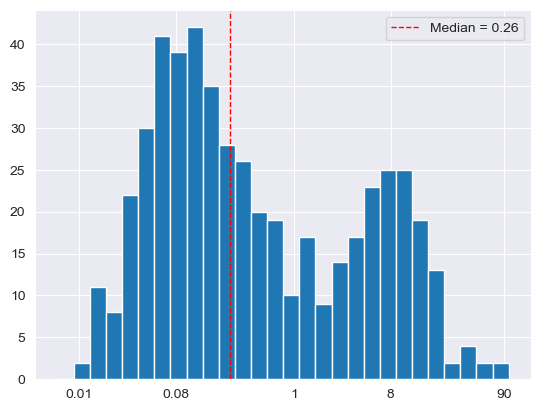

In [18]:
# Create a hist plot that uses log scale so we can see the distribution of the CRIM data points
hist_logarithimic_scale(df, 'CRIM', 0.15, [0.01,0.08,1,8,90])

**so from the chart above, we can deduce the following about the distribution of the CRIM metric:**

- Most towns have low crime rate, this is indicated by the median which is 0.26, indicating that half of the towns have low crime rate around and below 0.26.

- The graph is right skewed indicating that most towns have low crime rate

- The graph is right skewed also indicating that few town have significantly higher crime rate than the rests. This is the reason we could not see the distribution of the data points well before the log transformation.

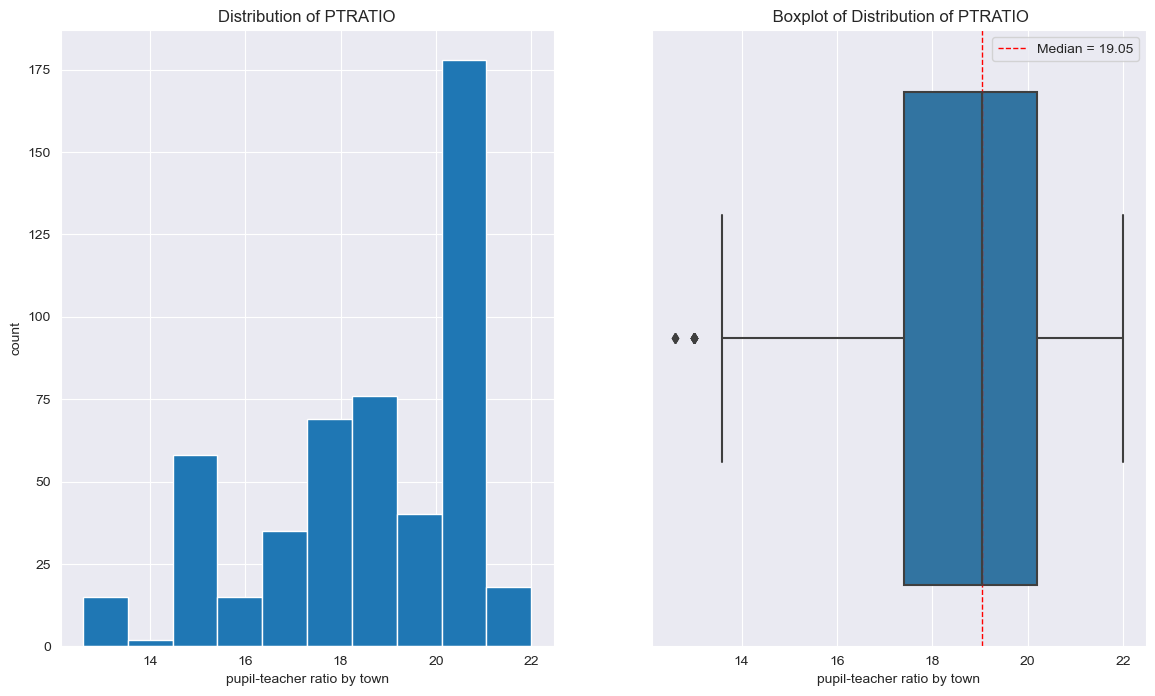

In [19]:
# Create a hist and box plot to see the distribution of the PTRATIO metric
hist_and_box_plot(df, 'PTRATIO', 'pupil-teacher ratio by town', 'count', 'Distribution of PTRATIO')

**from the charts above, we can see that the distribution of the PTRATIO is left skewed, in this case, the median is a better measure to use.**

- The PTRATIO stands for pupil-teacher ratio by town, and it usually calculated by dividing the numbers of students by the number of teachers. This metric can be used to measure the quality of education in each town.

- Higher ratio indicated lesser eduaction quality, while lower ratio represents higher education quality.

- The median value for PTRATIO is approximately 19, which means that half of the town have a PTRATIO below and around 19, and the rest above 19.

- Also, it is good to note that since it is left skewed, most of the data points falls on the right hand side of the graph, indicating that most towns have high PTRATIO. The implication of this is that most town have lesser education quality than the few towns with lower PTRATIO, meaning that teachers have to teach many students at once since most town have higher PTRATIO.

- Few towns have low PTRATIO, indicating better education quality since there can be a more individualized learning experince in this towns.